**Universidad Autónoma Metropolitana - Unidad Iztapalapa (UAM-I)**

**Maestría en Matemáticas Aplicadas e Industriales (MCMAI)**

**Taller de Modelado Matemático II - Parte I**

> Trimestre 25-P

**Profesor**: 
    
> Dr. Alejandro Román Vásquez

**Alumnos**: 
    
> Alan Badillo Salas
> 
> Brandon Eduardo Antonio Gómez
> 
> Diego Armando Arce Montes de Oca

In [1]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import seaborn

In [2]:
casas = pandas.read_csv("Casas.csv")
casas_kaggle = pandas.read_csv("Casas_Kaggle.csv")

In [3]:
columnas_analisis = [
    "MSZoning",
    "LotArea",
    "Street",
    "Neighborhood",
    "YearBuilt",
    "OverallCond",
    "ExterQual",
    "GrLivArea",
    "FullBath",
    "GarageArea",
    "BsmtCond",
    "FireplaceQu",
    "Electrical",
    "LotFrontage",
    "KitchenQual",
    "PavedDrive",
    "SalePrice",
]

casas_analisis = casas[columnas_analisis]

casas_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1460 non-null   object 
 1   LotArea       1460 non-null   int64  
 2   Street        1460 non-null   object 
 3   Neighborhood  1460 non-null   object 
 4   YearBuilt     1460 non-null   int64  
 5   OverallCond   1460 non-null   int64  
 6   ExterQual     1460 non-null   object 
 7   GrLivArea     1460 non-null   int64  
 8   FullBath      1460 non-null   int64  
 9   GarageArea    1460 non-null   int64  
 10  BsmtCond      1423 non-null   object 
 11  FireplaceQu   770 non-null    object 
 12  Electrical    1459 non-null   object 
 13  LotFrontage   1201 non-null   float64
 14  KitchenQual   1460 non-null   object 
 15  PavedDrive    1460 non-null   object 
 16  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(7), object(9)
memory usage: 194.0+ KB


In [4]:
MSZoning = casas_analisis["MSZoning"]
LotArea = casas_analisis["LotArea"]
Street = casas_analisis["Street"]
Neighborhood = casas_analisis["Neighborhood"]
YearBuilt = casas_analisis["YearBuilt"]
OverallCond = casas_analisis["OverallCond"]
ExterQual = casas_analisis["ExterQual"]
GrLivArea = casas_analisis["GrLivArea"]
FullBath = casas_analisis["FullBath"]
GarageArea = casas_analisis["GarageArea"]
BsmtCond = casas_analisis["BsmtCond"]
FireplaceQu = casas_analisis["FireplaceQu"]
Electrical = casas_analisis["Electrical"]
LotFrontage = casas_analisis["LotFrontage"]
KitchenQual = casas_analisis["KitchenQual"]
PavedDrive = casas_analisis["PavedDrive"]
SalePrice = casas_analisis["SalePrice"]

In [5]:
MSZoning.value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [6]:
pandas.DataFrame([MSZoning, SalePrice]).T

,MSZoning,SalePrice
0,RL,208500
1,RL,181500
2,RL,223500
3,RL,140000
4,RL,250000
...,...,...
1455,RL,175000
1456,RL,210000
1457,RL,266500
1458,RL,142125


In [7]:
r1 = pandas.DataFrame([MSZoning, SalePrice]).T.groupby("MSZoning").mean()
r2 = pandas.DataFrame([MSZoning, SalePrice]).T.groupby("MSZoning").median()

r1.join(r2, lsuffix="_mean", rsuffix="_median")

,SalePrice_mean,SalePrice_median
MSZoning,,
C (all),74528.0,74700.0
FV,214014.061538,205950.0
RH,131558.375,136500.0
RL,191004.994787,174000.0
RM,126316.830275,120500.0


In [8]:
pandas.DataFrame([MSZoning]).T.merge(r1, on="MSZoning")

,MSZoning,SalePrice
0,RL,191004.994787
1,RL,191004.994787
2,RL,191004.994787
3,RL,191004.994787
4,RL,191004.994787
...,...,...
1455,RL,191004.994787
1456,RL,191004.994787
1457,RL,191004.994787
1458,RL,191004.994787


In [9]:
MSZoningMeanSalePrice = pandas.DataFrame([MSZoning]).T.merge(r1, on="MSZoning")["SalePrice"]

MSZoningMeanSalePrice

0       191004.994787
1       191004.994787
2       191004.994787
3       191004.994787
4       191004.994787
            ...      
1455    191004.994787
1456    191004.994787
1457    191004.994787
1458    191004.994787
1459    191004.994787
Name: SalePrice, Length: 1460, dtype: object

In [10]:
Street.value_counts(normalize=True)

Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64

In [11]:
Neighborhood.value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [12]:
Neighborhood.value_counts().info()

<class 'pandas.core.series.Series'>
Index: 25 entries, NAmes to Blueste
Series name: count
Non-Null Count  Dtype
--------------  -----
25 non-null     int64
dtypes: int64(1)
memory usage: 400.0+ bytes


In [13]:
NeighborhoodMeanSalePrice = pandas.DataFrame([Neighborhood, SalePrice]).T.groupby("Neighborhood").mean().merge(Neighborhood, on="Neighborhood")["SalePrice"]
NeighborhoodMeanSalePrice

0       194870.882353
1       194870.882353
2       194870.882353
3       194870.882353
4       194870.882353
            ...      
1455    238772.727273
1456    238772.727273
1457    238772.727273
1458    238772.727273
1459    238772.727273
Name: SalePrice, Length: 1460, dtype: object

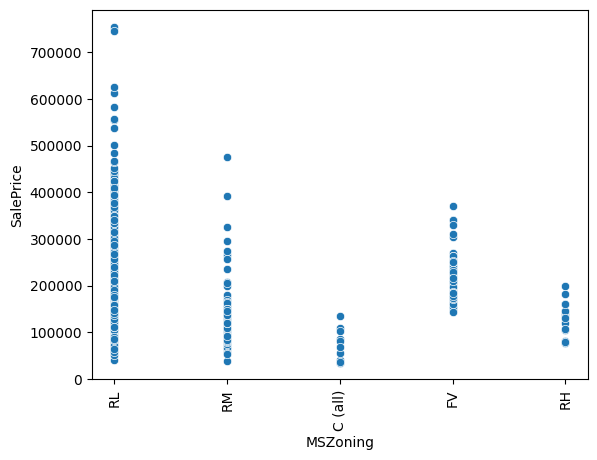

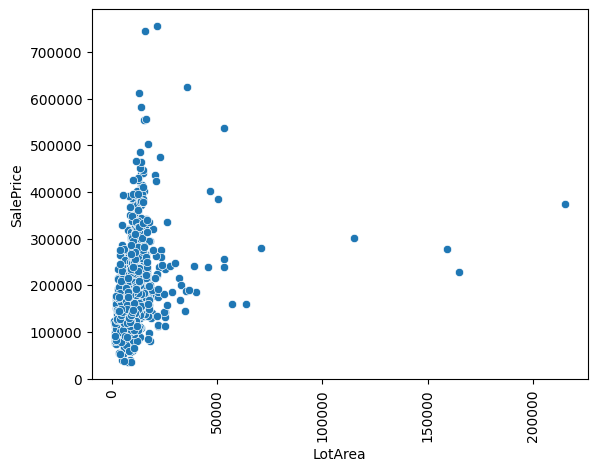

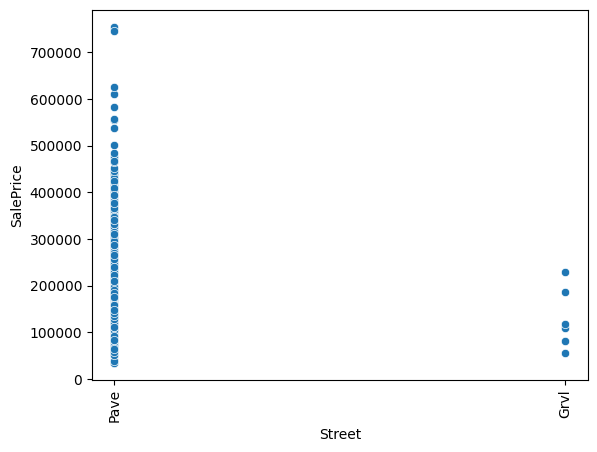

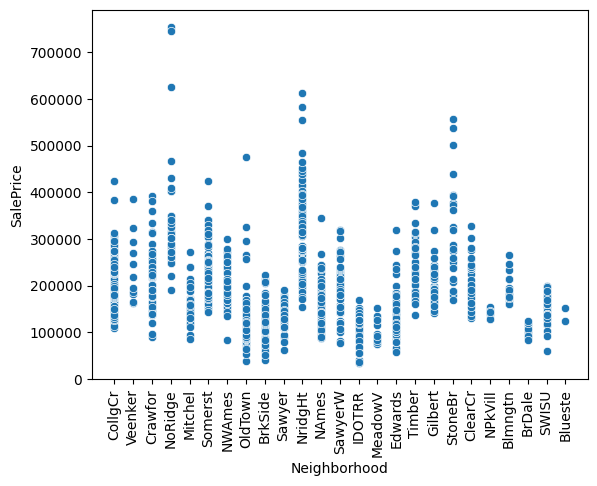

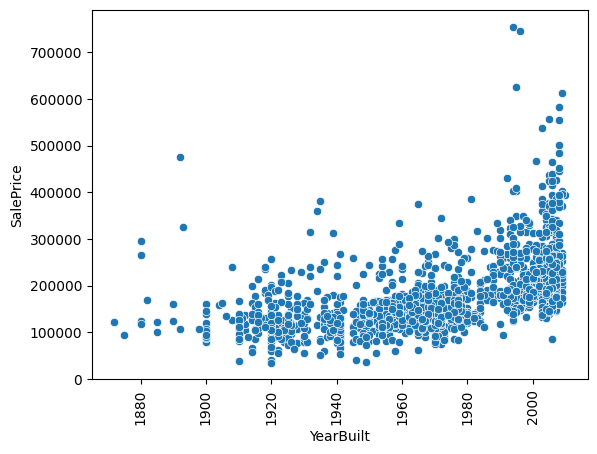

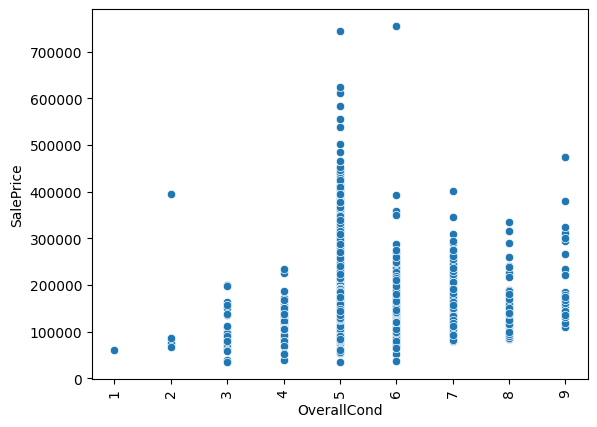

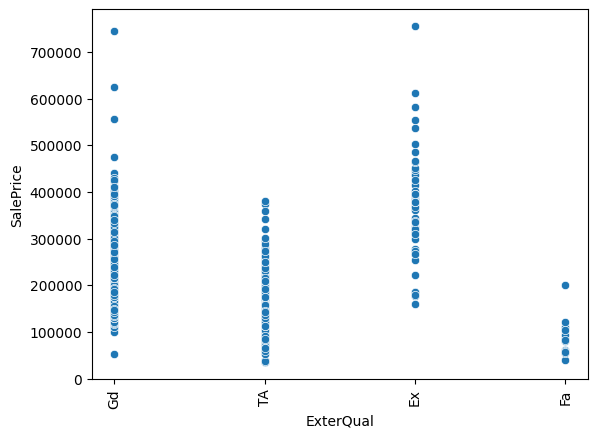

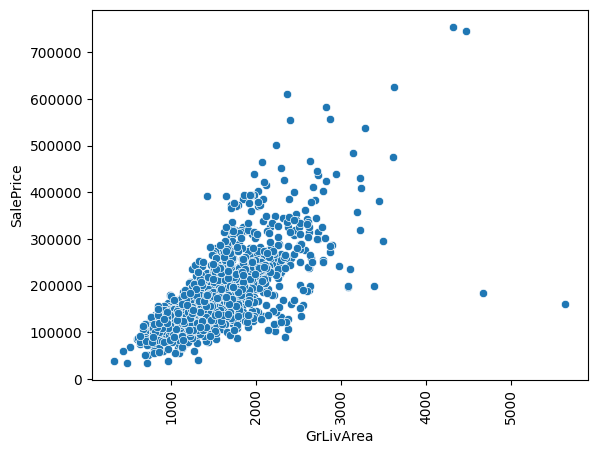

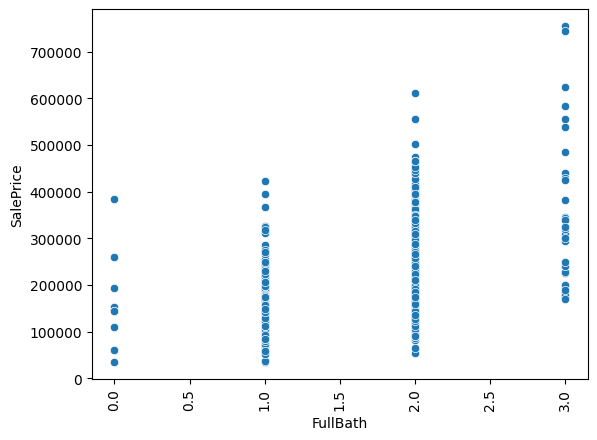

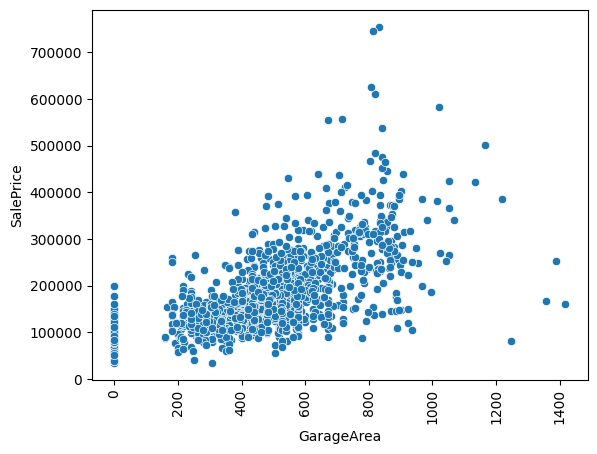

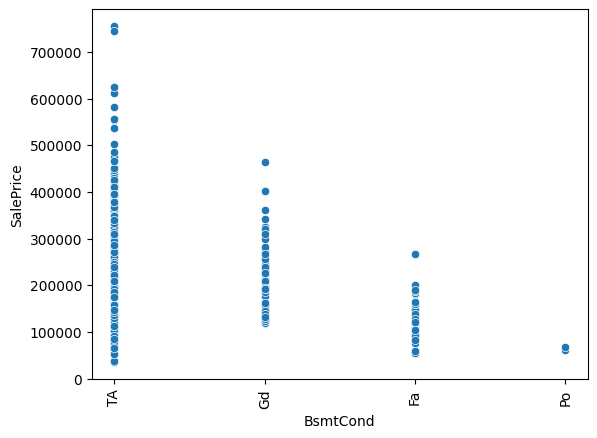

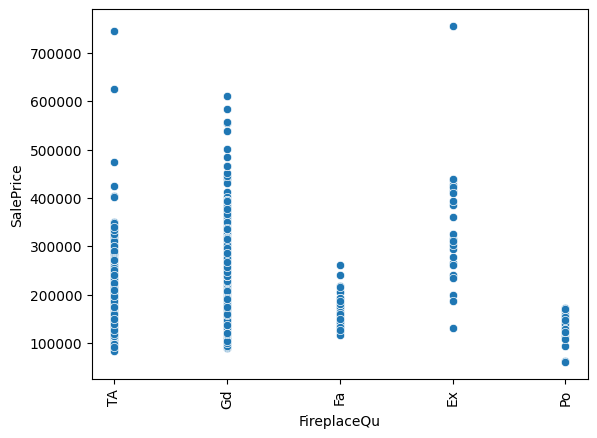

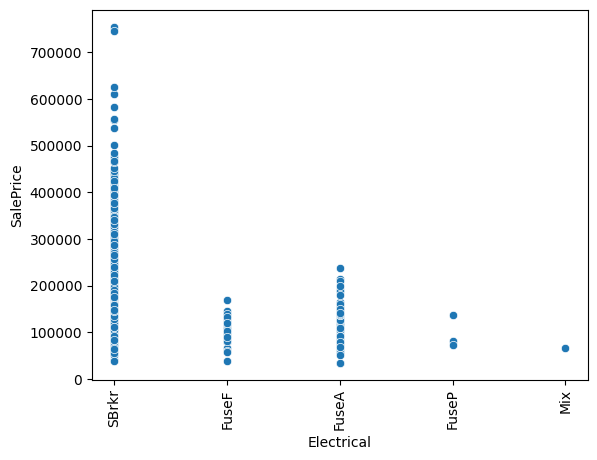

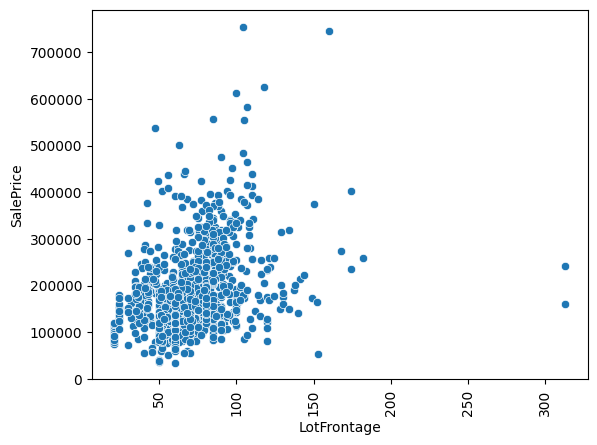

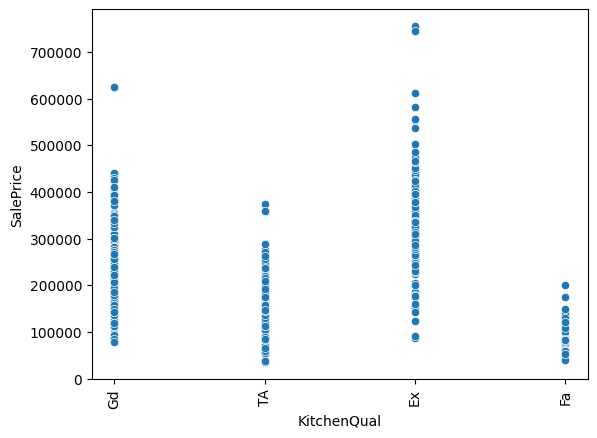

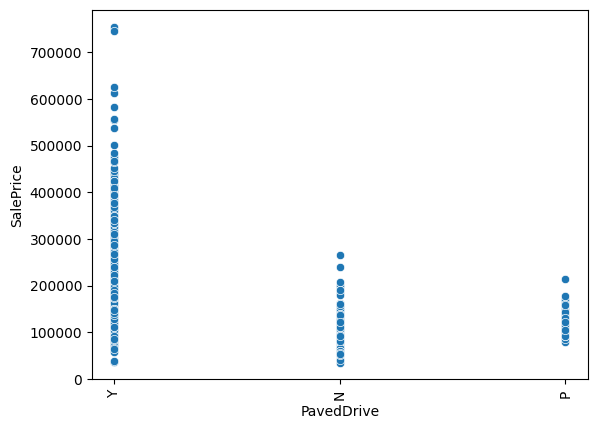

In [14]:
Ejes_X = [
    MSZoning,
    LotArea,
    Street,
    Neighborhood,
    YearBuilt,
    OverallCond,
    ExterQual,
    GrLivArea,
    FullBath,
    GarageArea,
    BsmtCond,
    FireplaceQu,
    Electrical,
    LotFrontage,
    KitchenQual,
    PavedDrive,
]

for x in Ejes_X:
    seaborn.scatterplot(x=x, y=SalePrice)
    pyplot.xticks(rotation=90)
    pyplot.show()

In [15]:
Ejes_Cats = [
    ("MSZoning", MSZoning),
    ("Neighborhood", Neighborhood),
    ("OverallCond", OverallCond),
    ("BsmtCond", BsmtCond),
    ("FireplaceQu", FireplaceQu),
    ("Electrical", Electrical),
]

for nombre, eje in Ejes_Cats:
    eje = eje.fillna("NA")
    eje_mean = pandas.DataFrame([eje, SalePrice]).T.groupby(nombre).mean().merge(eje, on=nombre)["SalePrice"]
    casas_analisis.loc[:, [f"{nombre}_mean"]] = eje_mean

casas_analisis.head()


,MSZoning,LotArea,Street,Neighborhood,YearBuilt,OverallCond,ExterQual,GrLivArea,FullBath,GarageArea,...,LotFrontage,KitchenQual,PavedDrive,SalePrice,MSZoning_mean,Neighborhood_mean,OverallCond_mean,BsmtCond_mean,FireplaceQu_mean,Electrical_mean
0,RL,8450,Pave,CollgCr,2003,5,Gd,1710,2,548,...,65.0,Gd,Y,208500,74528.0,194870.882353,61000.0,121809.533333,337712.5,122196.893617
1,RL,9600,Pave,Veenker,1976,8,TA,1262,2,460,...,80.0,TA,Y,181500,74528.0,194870.882353,141986.4,121809.533333,337712.5,122196.893617
2,RL,11250,Pave,CollgCr,2001,5,Gd,1786,2,608,...,68.0,Gd,Y,223500,74528.0,194870.882353,141986.4,121809.533333,337712.5,122196.893617
3,RL,9550,Pave,Crawfor,1915,5,TA,1717,1,642,...,60.0,Gd,Y,140000,74528.0,194870.882353,141986.4,121809.533333,337712.5,122196.893617
4,RL,14260,Pave,NoRidge,2000,5,Gd,2198,2,836,...,84.0,Gd,Y,250000,74528.0,194870.882353,141986.4,121809.533333,337712.5,122196.893617


In [16]:
Ejes_Dums = [
    ("ExterQual", ExterQual),
    ("FullBath", FullBath),
    ("KitchenQual", KitchenQual),
    ("PavedDrive", PavedDrive),
]

for nombre, eje in Ejes_Dums:
    eje = eje.fillna("NA")
    for i, cat in enumerate(eje.unique()):
        eje_dummy = (eje == cat).astype(int)
        casas_analisis.loc[:, [f"{nombre}_{cat}_dummy{i}"]] = eje_dummy

casas_analisis.sample(10)
        

,MSZoning,LotArea,Street,Neighborhood,YearBuilt,OverallCond,ExterQual,GrLivArea,FullBath,GarageArea,...,FullBath_1_dummy1,FullBath_3_dummy2,FullBath_0_dummy3,KitchenQual_Gd_dummy0,KitchenQual_TA_dummy1,KitchenQual_Ex_dummy2,KitchenQual_Fa_dummy3,PavedDrive_Y_dummy0,PavedDrive_N_dummy1,PavedDrive_P_dummy2
1330,RL,10000,Pave,Somerst,2006,5,Gd,1588,2,825,...,0,0,0,1,0,0,0,1,0,0
1030,RH,7082,Pave,SWISU,1916,8,TA,1928,2,0,...,0,0,0,0,1,0,0,0,1,0
823,RL,9900,Pave,SWISU,1940,7,TA,1489,2,240,...,0,0,0,0,1,0,0,1,0,0
1459,RL,9937,Pave,Edwards,1965,6,Gd,1256,1,276,...,1,0,0,0,1,0,0,1,0,0
607,RL,7800,Pave,Edwards,1948,8,TA,2008,3,230,...,0,1,0,0,0,1,0,1,0,0
700,RL,14331,Pave,Timber,2002,5,Gd,1800,2,765,...,0,0,0,1,0,0,0,1,0,0
1279,C (all),7500,Pave,IDOTRR,1920,4,TA,1128,1,528,...,1,0,0,0,1,0,0,1,0,0
345,RL,6435,Pave,BrkSide,1939,5,TA,1577,1,312,...,1,0,0,0,0,0,1,1,0,0
363,RM,1680,Pave,BrDale,1972,8,TA,987,1,264,...,1,0,0,1,0,0,0,1,0,0
583,RM,13500,Pave,OldTown,1893,9,Ex,2775,3,880,...,0,1,0,1,0,0,0,1,0,0


In [17]:
casas_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSZoning               1460 non-null   object 
 1   LotArea                1460 non-null   int64  
 2   Street                 1460 non-null   object 
 3   Neighborhood           1460 non-null   object 
 4   YearBuilt              1460 non-null   int64  
 5   OverallCond            1460 non-null   int64  
 6   ExterQual              1460 non-null   object 
 7   GrLivArea              1460 non-null   int64  
 8   FullBath               1460 non-null   int64  
 9   GarageArea             1460 non-null   int64  
 10  BsmtCond               1423 non-null   object 
 11  FireplaceQu            770 non-null    object 
 12  Electrical             1459 non-null   object 
 13  LotFrontage            1201 non-null   float64
 14  KitchenQual            1460 non-null   object 
 15  Pave

In [18]:
x1 = casas_analisis["MSZoning_mean"]
x2 = casas_analisis["LotArea"] # cont
x3 = casas_analisis["Neighborhood_mean"]
x4 = casas_analisis["YearBuilt"] # cont
x5 = casas_analisis["OverallCond_mean"]
x6 = casas_analisis["ExterQual_Gd_dummy0"]
x7 = casas_analisis["ExterQual_Ex_dummy2"]
x8 = casas_analisis["ExterQual_Fa_dummy3"]
x9 = casas_analisis["GrLivArea"] # cont
x10 = casas_analisis["FullBath_1_dummy1"]
x11 = casas_analisis["FullBath_3_dummy2"]
x12 = casas_analisis["FullBath_0_dummy3"]
x13 = casas_analisis["GarageArea"] # cont
x14 = casas_analisis["BsmtCond_mean"]
x15 = casas_analisis["FireplaceQu_mean"]
x16 = casas_analisis["Electrical_mean"]
x17 = casas_analisis["LotFrontage"] # cont
x18 = casas_analisis["KitchenQual_Gd_dummy0"]
x19 = casas_analisis["KitchenQual_Ex_dummy2"]
x20 = casas_analisis["KitchenQual_Fa_dummy3"]
x21 = casas_analisis["PavedDrive_N_dummy1"]
x22 = casas_analisis["PavedDrive_P_dummy2"]

In [19]:
X = pandas.DataFrame([
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10,
    x11, x12, x13, x14, x15, x16, x17, x18, x19, x20,
    x21, x22
], index=[
    "x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10",
    "x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20",
    "x21", "x22"
]).T

X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,74528.000000,8450.0,194870.882353,2003.0,61000.000000,1.0,0.0,0.0,1710.0,0.0,...,548.0,121809.533333,337712.500000,122196.893617,65.0,1.0,0.0,0.0,0.0,0.0
1,74528.000000,9600.0,194870.882353,1976.0,141986.400000,0.0,0.0,0.0,1262.0,0.0,...,460.0,121809.533333,337712.500000,122196.893617,80.0,0.0,0.0,0.0,0.0,0.0
2,74528.000000,11250.0,194870.882353,2001.0,141986.400000,1.0,0.0,0.0,1786.0,0.0,...,608.0,121809.533333,337712.500000,122196.893617,68.0,1.0,0.0,0.0,0.0,0.0
3,74528.000000,9550.0,194870.882353,1915.0,141986.400000,0.0,0.0,0.0,1717.0,1.0,...,642.0,121809.533333,337712.500000,122196.893617,60.0,1.0,0.0,0.0,0.0,0.0
4,74528.000000,14260.0,194870.882353,2000.0,141986.400000,1.0,0.0,0.0,2198.0,0.0,...,836.0,121809.533333,337712.500000,122196.893617,84.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,126316.830275,7917.0,238772.727273,1999.0,216004.545455,0.0,0.0,0.0,1647.0,0.0,...,460.0,183632.620900,205723.488818,186825.113193,62.0,0.0,0.0,0.0,0.0,0.0
1456,126316.830275,13175.0,238772.727273,1978.0,216004.545455,0.0,0.0,0.0,2073.0,0.0,...,500.0,183632.620900,205723.488818,186825.113193,85.0,0.0,0.0,0.0,0.0,0.0
1457,126316.830275,9042.0,238772.727273,1941.0,216004.545455,0.0,1.0,0.0,2340.0,0.0,...,252.0,183632.620900,205723.488818,186825.113193,66.0,1.0,0.0,0.0,0.0,0.0
1458,126316.830275,9717.0,238772.727273,1950.0,216004.545455,0.0,0.0,0.0,1078.0,1.0,...,240.0,183632.620900,205723.488818,186825.113193,68.0,1.0,0.0,0.0,0.0,0.0


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x18,x19,x20,x21,x22,x2_in,x4_in,x9_in,x13_in,x17_in
0,74528.000000,8450.0,194870.882353,2003.0,61000.000000,1.0,0.0,0.0,1710.0,0.0,...,1.0,0.0,0.0,0.0,0.0,8450.0,2003.0,1710.0,548.0,65.0
1,74528.000000,9600.0,194870.882353,1976.0,141986.400000,0.0,0.0,0.0,1262.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9600.0,1976.0,1262.0,460.0,80.0
2,74528.000000,11250.0,194870.882353,2001.0,141986.400000,1.0,0.0,0.0,1786.0,0.0,...,1.0,0.0,0.0,0.0,0.0,11250.0,2001.0,1786.0,608.0,68.0
3,74528.000000,9550.0,194870.882353,1915.0,141986.400000,0.0,0.0,0.0,1717.0,1.0,...,1.0,0.0,0.0,0.0,0.0,9550.0,1915.0,1717.0,642.0,60.0
4,74528.000000,14260.0,194870.882353,2000.0,141986.400000,1.0,0.0,0.0,2198.0,0.0,...,1.0,0.0,0.0,0.0,0.0,14260.0,2000.0,2198.0,836.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,126316.830275,7917.0,238772.727273,1999.0,216004.545455,0.0,0.0,0.0,1647.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7917.0,1999.0,1647.0,460.0,62.0
1456,126316.830275,13175.0,238772.727273,1978.0,216004.545455,0.0,0.0,0.0,2073.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13175.0,1978.0,2073.0,500.0,85.0
1457,126316.830275,9042.0,238772.727273,1941.0,216004.545455,0.0,1.0,0.0,2340.0,0.0,...,1.0,0.0,0.0,0.0,0.0,9042.0,1941.0,2340.0,252.0,66.0
1458,126316.830275,9717.0,238772.727273,1950.0,216004.545455,0.0,0.0,0.0,1078.0,1.0,...,1.0,0.0,0.0,0.0,0.0,9717.0,1950.0,1078.0,240.0,68.0


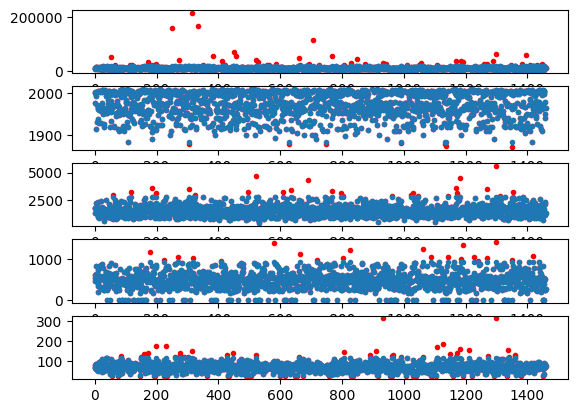

In [20]:
xs = [
    ("x2", x2), 
    ("x4", x4), 
    ("x9", x9), 
    ("x13", x13), 
    ("x17", x17)
]

fig, axis = pyplot.subplots(5, 1)

for i, (nombre, x) in enumerate(xs):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    xmin = Q1 - 1.5 * IQR
    xmax = Q3 + 1.5 * IQR
    xp = x.copy().astype(float)
    xp[xp >= xmax] = xmax
    xp[xp <= xmin] = xmin
    axis[i].plot(x.index, x, marker=".", linestyle="", color="red")
    axis[i].plot(xp.index, xp, marker=".", linestyle="")
    
    X.loc[:, [f"{nombre}_in"]] = xp 

X

In [21]:
X1 = X.copy().dropna(subset=["x17"])

y17 = X1["x17"]

del X1["x2"]
del X1["x4"]
del X1["x9"]
del X1["x13"]
del X1["x17"]
del X1["x17_in"]

X1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1201 non-null   float64
 1   x3      1201 non-null   float64
 2   x5      1201 non-null   float64
 3   x6      1201 non-null   float64
 4   x7      1201 non-null   float64
 5   x8      1201 non-null   float64
 6   x10     1201 non-null   float64
 7   x11     1201 non-null   float64
 8   x12     1201 non-null   float64
 9   x14     1201 non-null   float64
 10  x15     1201 non-null   float64
 11  x16     1201 non-null   float64
 12  x18     1201 non-null   float64
 13  x19     1201 non-null   float64
 14  x20     1201 non-null   float64
 15  x21     1201 non-null   float64
 16  x22     1201 non-null   float64
 17  x2_in   1201 non-null   float64
 18  x4_in   1201 non-null   float64
 19  x9_in   1201 non-null   float64
 20  x13_in  1201 non-null   float64
dtypes: float64(21)
memory usage: 206.4 KB


In [22]:
y17.info()

<class 'pandas.core.series.Series'>
Index: 1201 entries, 0 to 1459
Series name: x17
Non-Null Count  Dtype  
--------------  -----  
1201 non-null   float64
dtypes: float64(1)
memory usage: 18.8 KB


In [23]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()

reg.fit(X1, y17)

Xmiss = X[X1.columns][X["x17"].isna()]

yp = reg.predict(Xmiss)

X.loc[:, ["x17_imp"]] = X["x17"]
X.loc[X["x17"].isna(), ["x17_imp"]] = yp

X[["x17", "x17_imp"]].sample(10)

,x17,x17_imp
833,100.0,100.00
1249,60.0,60.00
750,55.0,55.00
1294,60.0,60.00
454,63.0,63.00
1390,70.0,70.00
1381,NaN,88.38
499,70.0,70.00
1372,75.0,75.00
1281,50.0,50.00


<Axes: ylabel='Density'>

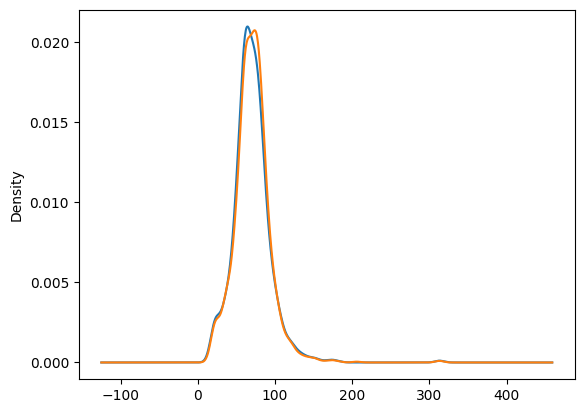

In [24]:
X["x17"].plot.density()
X["x17_imp"].plot.density()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x2_in,x4_in,x9_in,x13_in,x17_in,x17_imp,x17_imp_in
0,74528.000000,8450.0,194870.882353,2003.0,61000.000000,1.0,0.0,0.0,1710.0,0.0,...,0.0,0.0,0.0,8450.0,2003.0,1710.0,548.0,65.0,65.0,65.0
1,74528.000000,9600.0,194870.882353,1976.0,141986.400000,0.0,0.0,0.0,1262.0,0.0,...,0.0,0.0,0.0,9600.0,1976.0,1262.0,460.0,80.0,80.0,80.0
2,74528.000000,11250.0,194870.882353,2001.0,141986.400000,1.0,0.0,0.0,1786.0,0.0,...,0.0,0.0,0.0,11250.0,2001.0,1786.0,608.0,68.0,68.0,68.0
3,74528.000000,9550.0,194870.882353,1915.0,141986.400000,0.0,0.0,0.0,1717.0,1.0,...,0.0,0.0,0.0,9550.0,1915.0,1717.0,642.0,60.0,60.0,60.0
4,74528.000000,14260.0,194870.882353,2000.0,141986.400000,1.0,0.0,0.0,2198.0,0.0,...,0.0,0.0,0.0,14260.0,2000.0,2198.0,836.0,84.0,84.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,126316.830275,7917.0,238772.727273,1999.0,216004.545455,0.0,0.0,0.0,1647.0,0.0,...,0.0,0.0,0.0,7917.0,1999.0,1647.0,460.0,62.0,62.0,62.0
1456,126316.830275,13175.0,238772.727273,1978.0,216004.545455,0.0,0.0,0.0,2073.0,0.0,...,0.0,0.0,0.0,13175.0,1978.0,2073.0,500.0,85.0,85.0,85.0
1457,126316.830275,9042.0,238772.727273,1941.0,216004.545455,0.0,1.0,0.0,2340.0,0.0,...,0.0,0.0,0.0,9042.0,1941.0,2340.0,252.0,66.0,66.0,66.0
1458,126316.830275,9717.0,238772.727273,1950.0,216004.545455,0.0,0.0,0.0,1078.0,1.0,...,0.0,0.0,0.0,9717.0,1950.0,1078.0,240.0,68.0,68.0,68.0


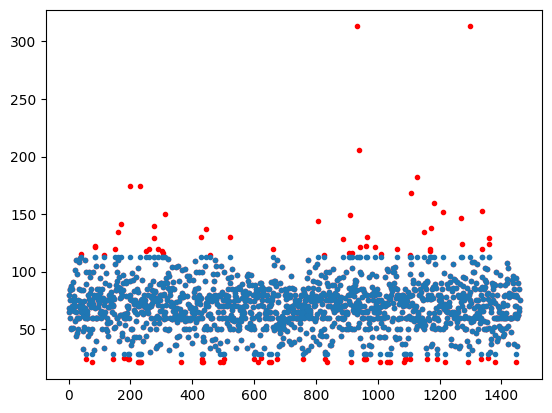

In [25]:
xs = [
    ("x17_imp", X["x17_imp"])
]

fig, axis = pyplot.subplots(len(xs), 1)

for i, (nombre, x) in enumerate(xs):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    xmin = Q1 - 1.5 * IQR
    xmax = Q3 + 1.5 * IQR
    xp = x.copy().astype(float)
    xp[xp >= xmax] = xmax
    xp[xp <= xmin] = xmin
    axis.plot(x.index, x, marker=".", linestyle="", color="red")
    axis.plot(xp.index, xp, marker=".", linestyle="")
    
    X.loc[:, [f"{nombre}_in"]] = xp 

X

<Axes: ylabel='Density'>

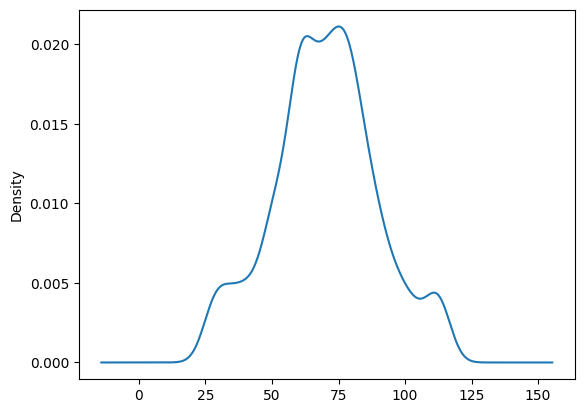

In [26]:
X["x17_imp_in"].plot.density()

<Axes: >

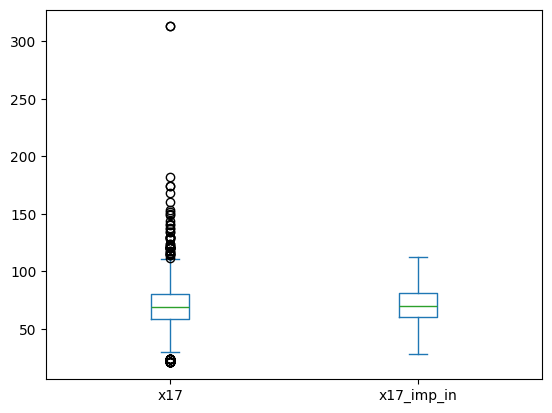

In [27]:
X[["x17", "x17_imp_in"]].plot.box()

In [28]:
X2 = X.copy()

del X2["x2"]
del X2["x4"]
del X2["x9"]
del X2["x13"]
del X2["x17"]
del X2["x17_in"]
del X2["x17_imp"]

X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x1          1460 non-null   float64
 1   x3          1460 non-null   float64
 2   x5          1460 non-null   float64
 3   x6          1460 non-null   float64
 4   x7          1460 non-null   float64
 5   x8          1460 non-null   float64
 6   x10         1460 non-null   float64
 7   x11         1460 non-null   float64
 8   x12         1460 non-null   float64
 9   x14         1460 non-null   float64
 10  x15         1460 non-null   float64
 11  x16         1460 non-null   float64
 12  x18         1460 non-null   float64
 13  x19         1460 non-null   float64
 14  x20         1460 non-null   float64
 15  x21         1460 non-null   float64
 16  x22         1460 non-null   float64
 17  x2_in       1460 non-null   float64
 18  x4_in       1460 non-null   float64
 19  x9_in       1460 non-null  

In [29]:
y = SalePrice

y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [49]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, train_size=0.8, shuffle=True, random_state=123)

X2_train.shape, X2_test.shape, y_train.shape, y_test.shape

((1168, 22), (292, 22), (1168,), (292,))

In [50]:
from sklearn.linear_model import Ridge, Lasso

reg1 = Ridge(alpha=1)
reg2 = Lasso(alpha=1)

reg1.fit(X2_train, y_train)
reg2.fit(X2_train, y_train)

print(f"Ridge: {reg1.score(X2_test, y_test)}")
print(f"Lasso: {reg2.score(X2_test, y_test)}")

Ridge: 0.8167297508869832
Lasso: 0.8174271547229777


In [51]:
X2

,x1,x3,x5,x6,x7,x8,x10,x11,x12,x14,...,x18,x19,x20,x21,x22,x2_in,x4_in,x9_in,x13_in,x17_imp_in
0,74528.000000,194870.882353,61000.000000,1.0,0.0,0.0,0.0,0.0,0.0,121809.533333,...,1.0,0.0,0.0,0.0,0.0,8450.0,2003.0,1710.0,548.0,65.0
1,74528.000000,194870.882353,141986.400000,0.0,0.0,0.0,0.0,0.0,0.0,121809.533333,...,0.0,0.0,0.0,0.0,0.0,9600.0,1976.0,1262.0,460.0,80.0
2,74528.000000,194870.882353,141986.400000,1.0,0.0,0.0,0.0,0.0,0.0,121809.533333,...,1.0,0.0,0.0,0.0,0.0,11250.0,2001.0,1786.0,608.0,68.0
3,74528.000000,194870.882353,141986.400000,0.0,0.0,0.0,1.0,0.0,0.0,121809.533333,...,1.0,0.0,0.0,0.0,0.0,9550.0,1915.0,1717.0,642.0,60.0
4,74528.000000,194870.882353,141986.400000,1.0,0.0,0.0,0.0,0.0,0.0,121809.533333,...,1.0,0.0,0.0,0.0,0.0,14260.0,2000.0,2198.0,836.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,126316.830275,238772.727273,216004.545455,0.0,0.0,0.0,0.0,0.0,0.0,183632.620900,...,0.0,0.0,0.0,0.0,0.0,7917.0,1999.0,1647.0,460.0,62.0
1456,126316.830275,238772.727273,216004.545455,0.0,0.0,0.0,0.0,0.0,0.0,183632.620900,...,0.0,0.0,0.0,0.0,0.0,13175.0,1978.0,2073.0,500.0,85.0
1457,126316.830275,238772.727273,216004.545455,0.0,1.0,0.0,0.0,0.0,0.0,183632.620900,...,1.0,0.0,0.0,0.0,0.0,9042.0,1941.0,2340.0,252.0,66.0
1458,126316.830275,238772.727273,216004.545455,0.0,0.0,0.0,1.0,0.0,0.0,183632.620900,...,1.0,0.0,0.0,0.0,0.0,9717.0,1950.0,1078.0,240.0,68.0


In [52]:
n, m = X2.shape

X3 = numpy.zeros((n, m))

columns = [
    "x1", "x2_in", "x3", "x4_in", "x5", "x6", "x7", "x8", "x9_in", "x10",
    "x11", "x12", "x13_in", "x14", "x15", "x16", "x17_imp_in", "x18", "x19", "x20",
    "x21", "x22"
]

for j, column in enumerate(columns):
    xj = X2[column]
    X3[:, j] = (xj - xj.mean()) / xj.std()

X3 = pandas.DataFrame(X3, columns=[f"x{j + 1}" for j in range(len(columns))])

X3

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,-4.083534,-0.333130,0.237730,1.052885,-4.262961,1.410829,-0.192111,-0.098363,0.428489,-0.89550,...,0.373381,-3.282135,3.640193,-3.025581,-0.262098,1.220838,-0.27107,-0.16561,-0.25622,-0.144792
1,-4.083534,-0.013184,0.237730,0.156125,-1.384055,-0.708318,-0.192111,-0.098363,-0.502177,-0.89550,...,-0.051523,-3.282135,3.640193,-3.025581,0.509166,-0.818548,-0.27107,-0.16561,-0.25622,-0.144792
2,-4.083534,0.445869,0.237730,0.986459,-1.384055,1.410829,-0.192111,-0.098363,0.586370,-0.89550,...,0.663088,-3.282135,3.640193,-3.025581,-0.107845,1.220838,-0.27107,-0.16561,-0.25622,-0.144792
3,-4.083534,-0.027095,0.237730,-1.869888,-1.384055,-0.708318,-0.192111,-0.098363,0.443031,1.11593,...,0.827255,-3.282135,3.640193,-3.025581,-0.519187,1.220838,-0.27107,-0.16561,-0.25622,-0.144792
4,-4.083534,1.283293,0.237730,0.953245,-1.384055,1.410829,-0.192111,-0.098363,1.442250,-0.89550,...,1.763975,-3.282135,3.640193,-3.025581,0.714837,1.220838,-0.27107,-0.16561,-0.25622,-0.144792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-2.095799,-0.481418,0.985904,0.920032,1.247144,-0.708318,-0.192111,-0.098363,0.297614,-0.89550,...,-0.051523,0.150550,0.575830,0.304180,-0.416351,-0.818548,-0.27107,-0.16561,-0.25622,-0.144792
1456,-2.095799,0.981431,0.985904,0.222552,1.247144,-0.708318,-0.192111,-0.098363,1.182578,-0.89550,...,0.141615,0.150550,0.575830,0.304180,0.766254,-0.818548,-0.27107,-0.16561,-0.25622,-0.144792
1457,-2.095799,-0.168427,0.985904,-1.006341,1.247144,-0.708318,5.201767,-0.098363,1.737238,-0.89550,...,-1.055841,0.150550,0.575830,0.304180,-0.210681,1.220838,-0.27107,-0.16561,-0.25622,-0.144792
1458,-2.095799,0.019367,0.985904,-0.707421,1.247144,-0.708318,-0.192111,-0.098363,-0.884415,1.11593,...,-1.113782,0.150550,0.575830,0.304180,-0.107845,1.220838,-0.27107,-0.16561,-0.25622,-0.144792


In [56]:
X3.shape, y.shape

((1460, 22), (1460,))

In [58]:
from sklearn.model_selection import train_test_split

X3_train, X3_test, y_train, y_test = train_test_split(X3, y, train_size=0.8, shuffle=True, random_state=123)

X3_train.shape, X3_test.shape, y_train.shape, y_test.shape

((1168, 22), (292, 22), (1168,), (292,))

In [90]:
from sklearn.linear_model import Ridge, Lasso

reg3 = Ridge(alpha=1)
reg4 = Lasso(alpha=10)

reg3.fit(X3_train, y_train)
reg4.fit(X3_train, y_train)

print(f"Ridge: {reg3.score(X3_test, y_test)}")
print(f"Lasso: {reg4.score(X3_test, y_test)}")

Ridge: 0.8174752376391161
Lasso: 0.8174474737103502


In [98]:
pandas.DataFrame(reg3.coef_, index=X3.columns, columns=["Ridge Beta"])

,Ridge Beta
x1,59.423913
x2,9622.669566
x3,-1646.940604
x4,16780.373038
x5,2361.218909
x6,10240.527099
x7,13341.389264
x8,-1912.984655
x9,31524.040368
x10,5290.727125


In [97]:
pandas.DataFrame(reg4.coef_, index=X3.columns, columns=["Lasso Beta"])

,Lasso Beta
x1,52.017061
x2,9626.704271
x3,-1643.112186
x4,16808.131831
x5,2349.171645
x6,10226.908333
x7,13334.823581
x8,-1898.405356
x9,31565.591072
x10,5302.586544


In [99]:
from sklearn.linear_model import PoissonRegressor

reg = PoissonRegressor()

reg.fit(X3_train, y_train)

print(f"Poisson: {reg.score(X3_test, y_test)}")

Poisson: 0.86373542005562
